In [1]:
import pandas as pd

auction=pd.read_csv(r"C:\Users\Osula\Documents\School\Spring 2017\574 - Data Mining\574 Final Project\Data\Original\auction.csv")
print(auction.head(), auction.shape)

    auctionid    bid   bidtime                     bidder  bidderrate  \
0  1638893549  175.0  2.230949               schadenfreud         0.0   
1  1638893549  100.0  2.600116                      chuik         0.0   
2  1638893549  120.0  2.600810                 kiwisstuff         2.0   
3  1638893549  150.0  2.601076                 kiwisstuff         2.0   
4  1638893549  177.5  2.909826  eli.flint@flightsafety.co         4.0   

   openbid  price                item   auction_type  
0     99.0  177.5  Cartier wristwatch  3 day auction  
1     99.0  177.5  Cartier wristwatch  3 day auction  
2     99.0  177.5  Cartier wristwatch  3 day auction  
3     99.0  177.5  Cartier wristwatch  3 day auction  
4     99.0  177.5  Cartier wristwatch  3 day auction   (10681, 9)


In [2]:
auction.auctionid.dtype

dtype('int64')

In [3]:
auction.isnull().sum()

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64

In [4]:
missing = pd.isnull(auction).any(axis=1)
print(type(missing), missing)
print(auction[missing], auction[missing].shape)

<class 'pandas.core.series.Series'> 0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10651    False
10652    False
10653    False
10654    False
10655    False
10656    False
10657    False
10658    False
10659    False
10660    False
10661    False
10662    False
10663    False
10664    False
10665    False
10666    False
10667    False
10668    False
10669    False
10670    False
10671    False
10672    False
10673    False
10674    False
10675    False
10676    False
10677    False
10678    False
10679    False
10680    False
Length: 10681, dtype: bool
        auctionid     

In [5]:
missing1 = auction[missing]
missing1.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
8168,8213922989,77.0,2.458229,NaN,2.0,0.95,93.0,Xbox game console,3 day auction
8169,8213922989,80.0,2.458403,NaN,2.0,0.95,93.0,Xbox game console,3 day auction
8170,8213922989,90.0,2.458623,NaN,2.0,0.95,93.0,Xbox game console,3 day auction
8174,8213922989,93.0,2.971597,NaN,2.0,0.95,93.0,Xbox game console,3 day auction
8999,8212140993,135.0,6.402141,mac_ranch,NaN,9.99,306.0,Xbox game console,7 day auction


Want to see if there is a difference in closing price among missing and non-missing bidderrate

In [6]:
stats=auction.drop('auctionid', axis=1).describe()
print(stats)
nf = stats.columns
print(nf)
print(auction[nf].skew())

                bid       bidtime    bidderrate       openbid         price
count  10681.000000  10681.000000  10670.000000  10681.000000  10681.000000
mean     207.586109      3.979628     31.936739     52.246256    335.043589
std      323.037396      2.353386    120.594074    168.453245    433.566009
min        0.010000      0.000567     -4.000000      0.010000     26.000000
25%       72.000000      1.949931      1.000000      1.000000    186.510000
50%      140.000000      4.140833      5.000000      4.990000    228.490000
75%      210.000000      6.448060     21.000000     50.000000    255.000000
max     5400.000000      6.999990   3140.000000   5000.000000   5400.000000
Index(['bid', 'bidtime', 'bidderrate', 'openbid', 'price'], dtype='object')
bid            5.380043
bidtime       -0.144428
bidderrate    12.856195
openbid       13.500984
price          4.207051
dtype: float64


In [7]:
auction['bidderrate'].mode()

0    0.0
dtype: float64

In [8]:
auction = auction.fillna({'bidderrate': 5.0}, inplace=True)
missing1 = pd.isnull(auction).any(axis=1)
print(auction[missing1], auction[missing1].shape)

        auctionid    bid   bidtime bidder  bidderrate  openbid  price  \
8168   8213922989   77.0  2.458229    NaN         2.0     0.95   93.0   
8169   8213922989   80.0  2.458403    NaN         2.0     0.95   93.0   
8170   8213922989   90.0  2.458623    NaN         2.0     0.95   93.0   
8174   8213922989   93.0  2.971597    NaN         2.0     0.95   93.0   
10002  8213037774   90.0  6.559074    NaN         2.0     1.00  127.5   
10004  8213037774   95.0  6.657049    NaN         2.0     1.00  127.5   
10005  8213037774  100.0  6.657188    NaN         2.0     1.00  127.5   
10007  8213037774  105.0  6.665648    NaN         2.0     1.00  127.5   
10008  8213037774  110.0  6.665810    NaN         2.0     1.00  127.5   
10009  8213037774  115.0  6.665949    NaN         2.0     1.00  127.5   
10011  8213037774  120.0  6.684167    NaN         2.0     1.00  127.5   
10329  8214330322   55.0  6.244745    NaN         1.0     0.99  117.5   
10330  8214330322   60.0  6.245116    NaN         1

Text(0.5,1,'bid')


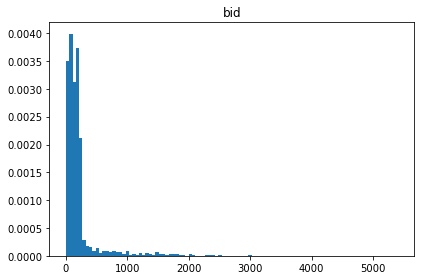

None
Text(0.5,1,'bidtime')


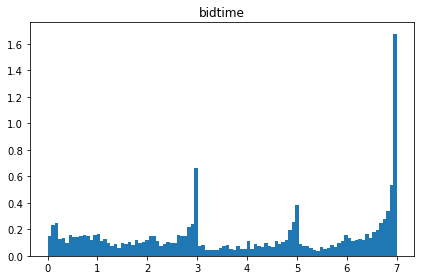

None
Text(0.5,1,'bidderrate')


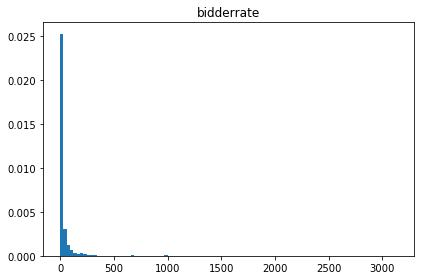

None
Text(0.5,1,'openbid')


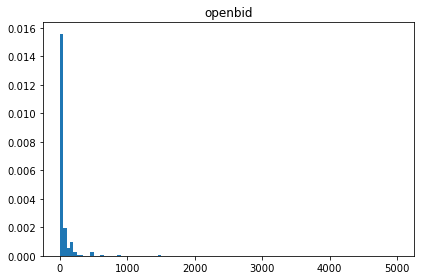

None
Text(0.5,1,'price')


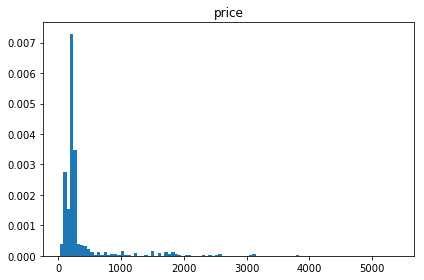

None


In [9]:
import matplotlib.pyplot as plt

for i in auction[nf].columns:
    print(plt.title('%s' %i))
    plt.hist(auction[i], bins=100, normed=True)
    plt.tight_layout()
    print(plt.show())

In [10]:
cf = auction.select_dtypes(include=['object']).columns
print(cf)
print(auction[cf].describe())

Index(['bidder', 'item', 'auction_type'], dtype='object')
              bidder                 item   auction_type
count          10665                10681          10681
unique          3387                    3              3
top     warrencheryl  Palm Pilot M515 PDA  7 day auction
freq              45                 5917           7041


In [11]:
print(auction['auctionid'].value_counts())

8214355679    75
8212629520    57
3023174478    54
3020532816    51
8212602164    50
1644594033    46
3018788243    45
3024823511    45
8212359174    45
8214330322    44
8212236671    43
3016342535    43
1649028956    42
3018594562    42
3023748273    42
8212140993    42
3024124623    41
3025665574    41
1650406935    41
1640809333    40
3025307420    40
3024165142    40
3022352711    39
3024676416    38
8213188385    38
8212903781    38
8214275008    38
3019540740    38
3026374373    37
3025473203    37
              ..
1647567213     2
1649845539     2
3025598698     2
3020382619     2
1639425502     2
1641457876     2
3022785804     2
3015358053     2
1649808226     2
3023920921     1
3025866584     1
3024504428     1
3015594808     1
3018740612     1
3023652961     1
3025639289     1
3018061782     1
3019821308     1
3025035412     1
3015010479     1
3016330514     1
3015513123     1
3016587753     1
3020269225     1
3024121735     1
3024122118     1
3024889358     1
3023183955    

In [12]:
for i in auction[cf].columns:
    print('---- %s ----' % i)
    print(auction[i].value_counts())

---- bidder ----
warrencheryl               45
zebedin                    33
mregestr                   33
babygirljrt                32
macdonn                    31
hawkswimmers               30
camotor1@aol.com           29
lass1004                   29
fil321blue                 28
shortstuff_96              28
restdynamics               27
golfergray                 27
dido-jan                   26
jmhboots                   25
leehoop555                 25
tabmeout                   24
kc10                       24
reharrell                  24
juanjose98                 23
mniffin01                  23
playa11229                 23
madorganist@yahoo.com      23
mikeyokred                 23
jonkocinski                23
ccsicandy                  22
mav4749                    22
dopplebock43               22
cowgirllucky               21
chimam                     21
cntrygl29                  21
                           ..
debofr                      1
nbw123                 

               auctionid
auction_type            
3 day auction        148
5 day auction         96
7 day auction        384


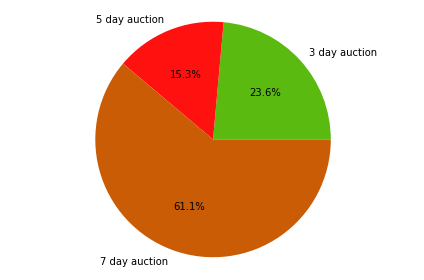

In [13]:
# Number of unique auctions for different auction types
num_type=auction.groupby('auction_type')['auctionid'].nunique()
# converts num_type series into a DataFrame
num_type=num_type.to_frame()
print(num_type)

import matplotlib.pyplot as plt

# Create a list of colors (from iWantHue)
colors=['#5ABA10', '#FE110E','#CA5C05']
# Create a pie chart
plt.pie(
    num_type['auctionid'],
    # df.index will output the row names as pandas Index object
    labels=num_type.index,
    # with no shadows
    shadow=False,
    # with colors
   colors=colors,
    # with the percent listed as a fraction autopct='%1.1f%%' = 10.1% while '%.0f%%' = 10%
    autopct='%1.1f%%',
    )

# when not 'equal' plot may not look like a circle
plt.axis('equal')

# Auto adjusts overlapping axes when there are one or multiple plots so you can see all labels
plt.tight_layout()
plt.show()

In [18]:
#auction.groupby('bidder').price.mean().plot(kind='bar', title='Average')